<a href="https://colab.research.google.com/github/shivi13102/Healthcare-Fraud-Provider-Detection-Analysis/blob/main/DataModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [25]:
# Load the final data
train_beneficiary= pd.read_excel('/content/drive/My Drive/FDS PROJECT/Final_data/train_bene_final_data.xlsx')

In [26]:
display(train_beneficiary.columns)

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'Country', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'ChronicConditionCount'],
      dtype='object')

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Define thresholds for fraud detection
threshold_ip = train_beneficiary['IPAnnualReimbursementAmt'].quantile(0.95)  # Top 5% for inpatient
threshold_op = train_beneficiary['OPAnnualReimbursementAmt'].quantile(0.95)  # Top 5% for outpatient

# Create the target variable 'fraud'
train_beneficiary['fraud'] = np.where(
    (train_beneficiary['IPAnnualReimbursementAmt'] > threshold_ip) |
    (train_beneficiary['OPAnnualReimbursementAmt'] > threshold_op),
    1,  # Fraudulent
    0   # Not fraudulent
)

# Define features (X) and target (y)
X = train_beneficiary.drop(columns=['fraud', 'DOB', 'DOD', 'BeneID'])  # Drop non-feature columns
y = train_beneficiary['fraud']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy variables

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))
print("AUC-ROC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]))

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))
print("AUC-ROC:", roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1]))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1760
           1       0.90      0.79      0.84       219

    accuracy                           0.97      1979
   macro avg       0.94      0.89      0.91      1979
weighted avg       0.97      0.97      0.97      1979

AUC-ROC: 0.9941832710668327
Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1760
           1       1.00      1.00      1.00       219

    accuracy                           1.00      1979
   macro avg       1.00      1.00      1.00      1979
weighted avg       1.00      1.00      1.00      1979

AUC-ROC: 1.0
Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1760
           1       1.00      1.00      1.00       219

    accuracy                           1.00      1979
   macro avg       1.00      1.0

Unsupervised

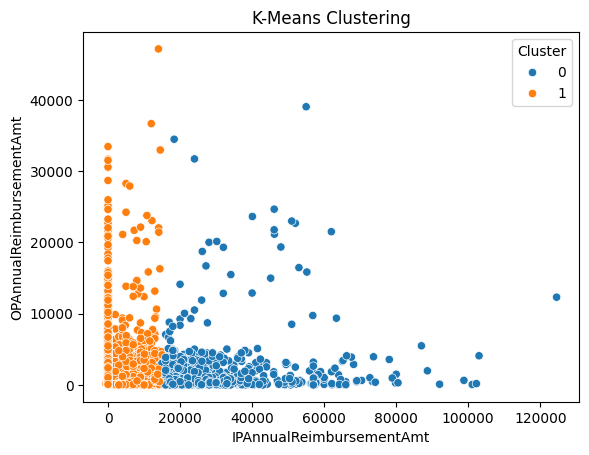

Detected Anomalies:


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,Country,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,ChronicConditionCount,fraud,Cluster,Anomaly
7,BENE11089,1926-10-01,NaT,F,3,Y,12,20,12,12,...,0,0,0,480,620,98,7,0,1,-1
35,BENE11300,1921-05-01,NaT,F,1,Y,5,20,12,12,...,0,0,0,180,440,103,6,0,1,-1
78,BENE11831,1926-10-01,NaT,F,1,N,12,20,12,12,...,0,0,0,8800,1110,98,6,1,1,-1
88,BENE11956,1940-06-01,NaT,M,1,Y,49,90,12,12,...,0,17000,1068,0,0,84,8,0,0,-1
94,BENE12037,1943-06-01,NaT,F,2,N,1,380,12,12,...,1,0,0,1010,340,81,8,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9855,BENE158592,1951-12-01,NaT,F,1,N,46,20,12,12,...,0,13000,1068,9360,1020,72,7,1,1,-1
9865,BENE158745,1915-11-01,NaT,M,5,Y,3,20,12,12,...,1,7000,1068,12430,4150,109,7,1,1,-1
9884,BENE159005,1919-07-01,NaT,M,1,N,3,60,12,12,...,0,30000,1068,300,60,105,8,1,0,-1
9890,BENE159127,1939-04-01,NaT,F,1,Y,50,20,12,12,...,0,13800,1068,1500,540,85,6,0,1,-1


In [28]:
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt

# K-Means Clustering
kmeans = KMeans(n_clusters=2)  # Adjust the number of clusters as needed
train_beneficiary['Cluster'] = kmeans.fit_predict(X)

# Plotting the clusters
sns.scatterplot(data=train_beneficiary, x='IPAnnualReimbursementAmt', y='OPAnnualReimbursementAmt', hue='Cluster')
plt.title("K-Means Clustering")
plt.show()

# Isolation Forest
iso_forest = IsolationForest(contamination=0.1)  # Adjust contamination as needed
train_beneficiary['Anomaly'] = iso_forest.fit_predict(X)
anomalies = train_beneficiary[train_beneficiary['Anomaly'] == -1]  # Outliers

# Print anomalies
print("Detected Anomalies:")
display(anomalies)


Feature Importance Analysis

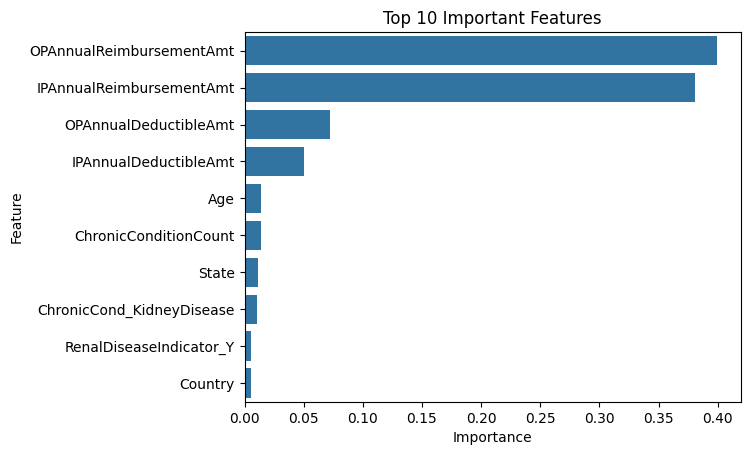

In [29]:
# Feature Importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plotting feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title("Top 10 Important Features")
plt.show()


In [30]:
import pandas as pd
import numpy as np

# Assuming you have your trained models and test data ready
# log_model, rf_model, gb_model are your trained models
# X_test contains your test features
# y_test contains your actual labels

# Step 1: Assign Fraud Risk Scores
# Get the probability scores for each model
log_prob = log_model.predict_proba(X_test)[:, 1]
rf_prob = rf_model.predict_proba(X_test)[:, 1]
gb_prob = gb_model.predict_proba(X_test)[:, 1]

# Create a DataFrame to hold predictions and probabilities
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Logistic_Prob': log_prob,
    'RF_Prob': rf_prob,
    'GB_Prob': gb_prob
})

# Average the probabilities to get an overall fraud risk score
predictions_df['Fraud_Risk_Score'] = predictions_df[['Logistic_Prob', 'RF_Prob', 'GB_Prob']].mean(axis=1)

# Step 2: Profiling High-Risk Groups
# Define a threshold for high fraud risk (e.g., >0.5)
high_risk_threshold = 0.5
high_risk_group = predictions_df[predictions_df['Fraud_Risk_Score'] > high_risk_threshold]

# Add relevant beneficiary information from the original dataset
high_risk_group = high_risk_group.join(train_beneficiary.loc[X_test.index, ['BeneID', 'ChronicConditionCount', 'IPAnnualReimbursementAmt', 'OPAnnualReimbursementAmt']])

# Analyze common patterns in high-risk beneficiaries
common_patterns = high_risk_group.groupby('ChronicConditionCount').agg({
    'IPAnnualReimbursementAmt': ['mean', 'count'],
    'OPAnnualReimbursementAmt': ['mean', 'count'],
}).reset_index()

print("High-Risk Group Analysis:")
display(common_patterns)

# Step 3: Cost-Benefit Analysis
# Define the costs and potential savings
# Assuming you have a cost for each fraudulent claim caught
cost_per_fraudulent_claim = 10000  # Define your cost here
flagged_as_fraud = predictions_df[predictions_df['Fraud_Risk_Score'] > high_risk_threshold]

# Calculate total potential savings from flagged fraudulent claims
# Assuming that each fraudulent claim is flagged as such
total_fraudulent_claims_flagged = flagged_as_fraud['Actual'].sum()  # Count how many were actually fraudulent
potential_savings = total_fraudulent_claims_flagged * cost_per_fraudulent_claim

# Display results
print("\nCost-Benefit Analysis:")
display(f"Total Fraudulent Claims Flagged: {total_fraudulent_claims_flagged}")
display(f"Potential Savings from Flagged Claims: ${potential_savings:,.2f}")



High-Risk Group Analysis:


ChronicConditionCount IPAnnualReimbursementAmt        \
                                             mean count   
0                      0             41180.000000     1   
1                      1             25351.428571     7   
2                      2             18110.000000    11   
3                      3             13609.166667    24   
4                      4             15432.142857    28   
5                      5             11506.071429    28   
6                      6             22615.121951    41   
7                      7             21194.444444    36   
8                      8             26495.909091    22   
9                      9             37615.714286    14   
10                    10             41768.333333     6   
11                    11             44200.000000     1   

   OPAnnualReimbursementAmt        
                       mean count  
0                430.000000     1  
1               2910.000000     7  
2               3805.454545    11  
3               3913.333333    24  
4               5806.428571    28  
5               8671.785714    28  
6               4736.341463    41  
7               4378.888889    36  
8               3780.454545    22  
9               3986.428571    14  
10              3723.333333     6  
11               110.000000     1


Cost-Benefit Analysis:


'Total Fraudulent Claims Flagged: 219'

'Potential Savings from Flagged Claims: $2,190,000.00'